<a href="https://colab.research.google.com/github/sanvasu/deeplearning/blob/main/CNN_Deep_Learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [4]:
!python create_pickle.py

Pickle files created: x.pickle and y.pickle


In [5]:
import os

In [6]:
print(os.listdir('.'))

['.config', 'y.pickle', 'x.pickle', 'create_pickle.py', 'sample_data']


In [20]:
x = pickle.load(open("x.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = x/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5516 - loss: 0.7000 - val_accuracy: 0.3600 - val_loss: 0.6950
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4774 - loss: 0.6933 - val_accuracy: 0.3600 - val_loss: 0.6984
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4966 - loss: 0.6935 - val_accuracy: 0.3600 - val_loss: 0.6967
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5053 - loss: 0.6932 - val_accuracy: 0.3600 - val_loss: 0.6983
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5269 - loss: 0.6924 - val_accuracy: 0.3600 - val_loss: 0.7022
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5035 - loss: 0.6935 - val_accuracy: 0.3600 - val_loss: 0.6994
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5119 - loss: 0.6929 - val_accuracy: 0.3600 - val_loss: 0.7044
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5361 - loss: 0.6913 - val_accuracy: 0.3600 - v

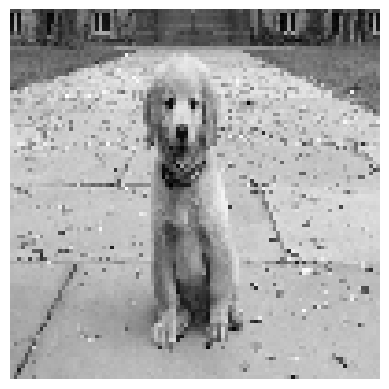

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Prediction: [[0.00147775]]
The model predicts: Not Dog


In [21]:
img_path = 'dog1.jpg'  # Replace with the path to your dog image

# Load the image
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')  # Load in grayscale
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
img_array = img_array / 255.0  # Normalize the pixel values

# Display the image
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

# Make a prediction
prediction = model.predict(img_array)

# Output the prediction
print("Prediction:", prediction)

# Interpret the prediction
if prediction[0] > 0.5:
    print("The model predicts: Dog")
else:
    print("The model predicts: Not Dog")

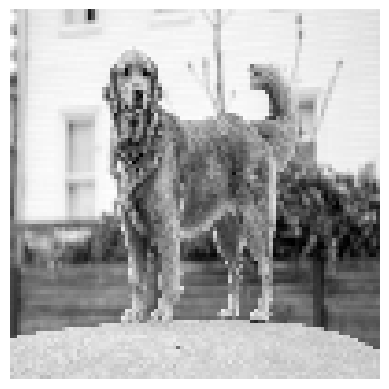

In [11]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = 'dog.jpeg'  # Replace with the path to your dog image

# Load the image
img = image.load_img(img_path, target_size=(100, 100), color_mode='grayscale')  # Load in grayscale
img_array = image.img_to_array(img)  # Convert the image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
img_array = img_array / 255.0  # Normalize the pixel values

# Display the image
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Constants
IMG_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 20
data_directory = 'cats_and_dogs/cats'

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_directory,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Model creation
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Function to predict on a single image
def predict_image(img_path):
    from keras.preprocessing.image import load_img, img_to_array

    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")
    plt.show()

    print(f"Confidence: {prediction[0][0]:.2f}")
    print(f"The model predicts: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")

# Example usage
# predict_image('path_to_your_image.jpg')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Must provide at least one structure